# CAPSTONE PROJECT (MARKETING CAMPAIGN DATASET)

# 1. Overview

### 1.1 Latar Belakang

Sebuah perusahaan melakukan *Customer Personality Analysis* (Analisis Perilaku) terhadap populasi customer mereka. Analisis ini diharapkan membantu perusahaan untuk membuat perencanaan dalam aspek bisnis pemasaran (marketing) dengan efisien. Selain itu, perusahaan bisa mengerti populasi target customer yang sesuai dan menjalankan bisnis berdasarkan hasil analisis.

### 1.2 Pernyataan Masalah

Analisis Perilaku Customer bertujuan **untuk memberikan informasi rinci mengenai customer ideal untuk sebuah perusahaan**. Dalam hal ini, perusahaan dapat menyesuaikan rencana pemasaran suatu barang sesuai kelompok target customer yang berpeluang besar melakukan transaksi. Sebagai contoh, ketika perusahaan bisa mengetahui prioritas pembelian produk dari suatu kelompok customer, usaha pemasaran bisa dilakukan secara efisien dan tepat sasaran.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik customer berdasarkan barang yang dibeli, latar belakang pendidikan, status perkawinan, segmen umur dan segmen pendapatan?**

## 2. Dataset

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1ebSmmLEh7dtkTd5iCCZVmEa8BHMHiDVg).

In [746]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype
import plotly.express as px 

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Dataset ini berisi informasi terkait demografis populasi customer dari banyak variable seperti tahun kelahiran, tingkat pendidikan, status perkawinan dll. Ada 29 kolom di dalam dataset marketing_campaign, yaitu:

People
* ID: Id unik tiap customer
* Year_Birth: Tahun kelahiran
* Education: Tingkat pendidikan customer
* Marital_Status: Status perkawinan customer
* Income: Pendapatan customer per tahun
* Kidhome: Jumlah anak kecil yang dimiliki customer
* Teenhome: Jumlah anak remaja yang dimiliki customer
* Dt_Customer: Tanggal pendaftaran customer ke perusahaan
* Recency: Jumlah hari sejak customer melakukan transaksi terakhir
* Complain: 1 jika customer melakukan komplain sejak dua tahun terakhir, 0 lainnya

Products
* MntWines: Jumlah belanja untuk produk Wine selama dua tahun terakhir
* MntFruits: Jumlah belanja untuk produk Buah selama dua tahun terakhir
* MntMeatProducts: Jumlah belanja untuk produk daging selama dua tahun terakhir
* MntFishProducts: Jumlah belanja untuk produk Ikan selama dua tahun terakhir
* MntSweetProducts: Jumlah belanja untuk produk Manisan selama dua tahun terakhir
* MntGoldProds: Jumlah belanja untuk produk Emas selama dua tahun terakhir

Promotion
* NumDealsPurchases: Jumlah pembelian menggunakan diskon
* AcceptedCmp1: 1 jika customer menerima penawaran di usaha pemasaran ke-1, 0 lainnya
* AcceptedCmp2: 1 jika customer menerima penawaran di usaha pemasaran ke-2, 0 lainnya
* AcceptedCmp3: 1 jika customer menerima penawaran di usaha pemasaran ke-3, 0 lainnya
* AcceptedCmp4: 1 jika customer menerima penawaran di usaha pemasaran ke-4, 0 lainnya
* AcceptedCmp5: 1 jika customer menerima penawaran di usaha pemasaran ke-5, 0 lainnya
* Response: 1 jika customer menerima penawaran di usaha pemasaran yang terakhir, 0 lainnya

Place
* NumWebPurchases: Jumlah pembelian melalui website perusahaan
* NumCatalogPurchases: Jumlah pembelian melalui menggunakan katalog
* NumStorePurchases: Jumlah pembelian langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan pada bulan terakhir

Other
* Z_CostContact: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.	
* Z_Revenue: Kolom tidak mempunyai arti pada dataset dan tidak mempunyai peran dalam analisis.

Berikut 5 baris teratas dan terbawah dari dataset marketing_campaign

In [747]:
df = pd.read_csv("marketing_campaign.csv", sep='\t')

display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## 3. Data Understanding dan Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap identifikasi anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset marketing_campaign.

### 3.1 Check Informasi Dataset

In [748]:
print(f"Jumlah baris dan kolom di dalam dataset df adalah {df.shape}")
df.info()

Jumlah baris dan kolom di dalam dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 n

In [749]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### 3.2 Check Jumlah Unique Values Dalam Dataset

In [750]:
listItem = []
for col in df.columns:
    x = df[col].value_counts().count()
    listItem.append(x)
    
pd.DataFrame(listItem, index = df.columns, columns = ['Jumlah Unique Values'])

,Jumlah Unique Values
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


Secara umum, kita bisa melihat bahwa:
* dataset marketing_campaign memiliki 29 feature/kolom dan 2240 data/baris
* Jenis data setiap fitur (kolom) terbagi menjadi jenis data yaitu Object(3 fitur), int64(25 fitur) dan float64(1 fitur)
* hanya kolom `income` yang memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan value NaN.
* beberapa feature/kolom akan lebih baik diubah menjadi kategorikal ordinal agar mempermudah analisis

### 3.3 Check Duplicate Value Dalam Dataset

In [751]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Bisa kita lihat bahwa tidak ditemukan duplikat value dalam dataset _marketing_campaign_

### 3.4 Kolom `ID`, `Z_CostContact` dan `Z_Revenue` (Redundant)

* kolom `ID` berisikan id unik untuk tiap peserta, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

* kolom `Z_CostContact`	dan `Z_Revenue` berisikan data yang sama pada semua baris, sehingga tidak relevan dan bisa dihapus saja.

In [752]:
df = df.drop(columns=['ID','Z_CostContact','Z_Revenue'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### 3.5 Kolom `MntGoldProds` 
- Nama kolom tidak sejalan dengan produk lain. Maka nama kolom `MntGoldProds` akan saya rubah ke `MntGoldProducts`

In [753]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

### 3.6 Missing Value

In [754]:
# persentase missing value pada kolom 'Income'
df['Income'].isna().sum()/df.shape[0]*100

1.0714285714285714

Karena jumlah baris/kolom yang berisi *missing value* cukup kecil (~1.07%) maka bisa dihapus.

**Menghapus missing value**

In [755]:
df = df.dropna()
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Sekarang, tersisa **2216** baris dari awal **2240** baris setelah dilakukan drop baris yang memiliki missing value.

### 3.7 Mengurutkan Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`
Untuk mempermudah membaca dataset maka semua kolom _Accepted Campaign_ diurutkan

In [756]:
df = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,19,20,21,24,25]]
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### 3.8 Memeriksa apakah terdapat nilai outlier

In [757]:
# Mencari kolom yg berisi nilai numerikal
num_feature = [fea for fea in df.describe().columns]
len(num_feature)

23

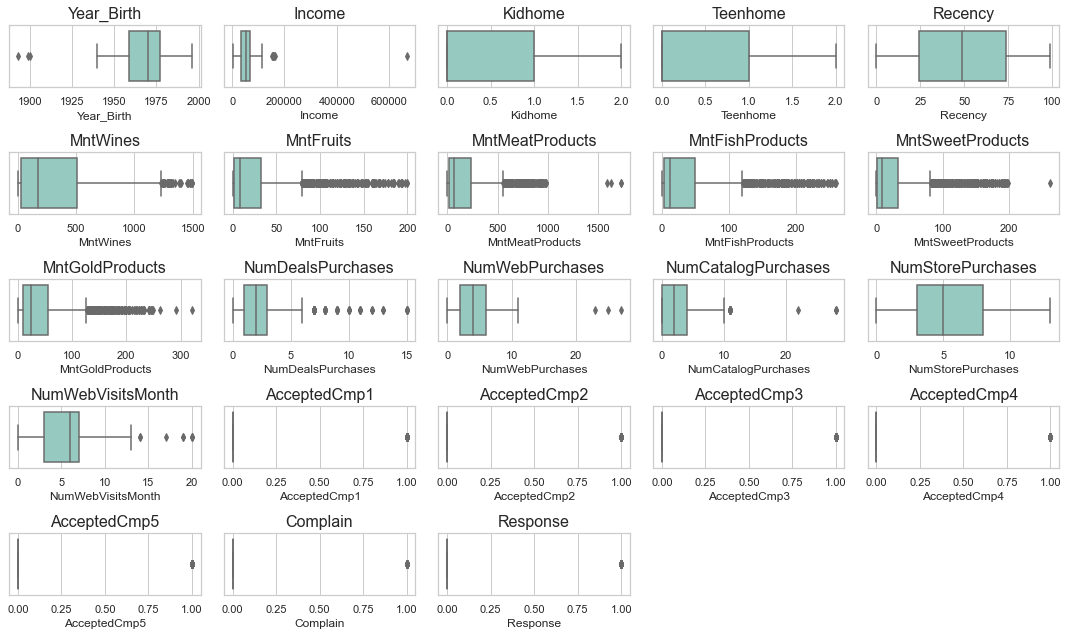

In [758]:
# Menunjukkan distribusi data tiap feature/kolom menggunakan boxplot
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(5,5, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


Dari semua boxplot feature diatas, kita bisa melihat ada beberapa feature yang memiliki nilai outlier. Berikutnya, ada 5 feature yang akan saya buang outliernya. Reasoning untuk masing-masing kolom akan saya jabarkan dibawah:
**Reasoning**
- kolom `Income`: terdapat 1 data yg mempunyai income $666666.0. Hal ini kemungkinan besar disebabkan salah memasukkan data. 
- kolom `Year_Birth`: terdapat hanya 3 data yg lahir sebelum tahun 1900. Hal ini kemungkinan besar disebabkan salah memasukkan data.
- kolom `MntMeatProducts`: terdapat hanya 4 data yg jumlah belanja daging lebih dari $1500. Hal ini kemungkinan besar disebabkan salah memasukkan data.
- kolom `MntSweetProducts`: terdapat hanya 1 data yg jumlah belanja daging lebih dari $200. Hal ini kemungkinan besar disebabkan salah memasukkan data.
- kolom `MntGoldProducts`: terdapat hanya 2 data yg jumlah belanja daging lebih dari $270. Hal ini kemungkinan besar disebabkan salah memasukkan data.

In [759]:
# Outliers
outliers = df[((df['Income'] > 600000) | (df['Year_Birth'] <= 1900) | (df['MntMeatProducts'] > 1500) | (df['MntSweetProducts'] > 200) | (df['MntGoldProducts']>270 ))]
outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
21,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0
1806,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,0
1898,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0
1975,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,0


In [760]:
df.drop(outliers.index,inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### 3.9 Kolom `Marital_Status`
Sebelum memulai, mari kita ubah data 'YOLO','Absurd' dan 'Alone' di kolom `Marital_Status`
- Pada value 'YOLO' dan 'Absurd', saya menemukan sebuah pola yaitu kedua value tersebut mempunyai Kidhome >0 dan Teenhome >0. Jadi saya akan mengubah valuenya menjadi 'Married'.
- Sedangkan value 'Alone' akan saya artikan sebagai 'Single', berdasarkan definisi kata tersebut.

In [761]:
# memeriksa unique value pada kolom Marital_Status
df['Marital_Status'].value_counts()

Married     853
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [762]:
df["Marital_Status"].replace({"YOLO": "Married", "Absurd": "Single", "Alone": "Single"}, inplace=True)

In [763]:
df['Marital_Status'].value_counts()

Married     855
Together    570
Single      473
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

Sekarang hanya terdapat 5 value yang bisa dianalisis pada kolom `Marital_Status`.

Agar mudah menganalisa, saya akan membuat kolom baru berisi kategori berdasarkan range nilai numerikal tertentu pada beberapa kolom. Kolom Year_Birth dan Income.
<br> 1. Pada kolom `Year_Birth`
saya membuat 3 kategori setelah disederhanakan berdasarkan range tahun kelahiran, mengacu kepada link: https://theactiveage.com/who-do-you-think-you-are-seven-generations-to-choose-from/
- BabyBoomers (lahir antara 1901–1964)
- GenerationX (lahir antara 1965–1980)
- Millennials (lahir antara 1981–1996)
<br>Reasoning: Mempermudah mengetahui target market untuk produk tertentu terhadap setiap generasi umur. 

<br>2. Kolom `Income`
mempunyai 3 klasifikasi kategorikal ordinal
- low yaitu antara (nilai minimum Income sampai nilai quantile-25) atau ($1,730 sampai $35,303 pa)
- medium (nilai quantile-25 sampai nilai quantile-75) atau ($35,303 sampai $68,522 pa)
- high (nilai quantile-75 sampai nilai maksimum Income ) atau ($68,522 sampai $666,666 pa)
Reasoning: Untuk mengetahui apakah proporsi suatu produk berkorelasi dengan pendapatan.

<br> 3. Untuk kolom (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`,`MntSweetProducts`,`MntGoldProds`) saya akan mengelompokkan mereka menjadi tiga kategori:
- PrimerProds terdiri dari `MntFruits`, `MntMeatProducts`, `MntFishProducts`
- SekunderProds terdiri dari `MntSweetProducts`, `MntWines`
- TersierProds terdiri dari `MntGoldProds`
<br>Reasoning: 
- Produk Primer adalah produk utama untuk bertahan hidup. Dalam hal ini adalah produk Fruits, Meat, dan Fish.
- Produk Sekunder adalah produk pendukung untuk meningkatkan kualitas hidup seseorang. Produk Sweet dan Wines masuk kedalamnya.
- Produk Tersier adalah berupa produk investasi. Pada dataset adalah hanya produk Gold.


- BabyBoomers (lahir antara 1901–1964)
- GenerationX (lahir antara 1965–1980)
- Millennials (lahir antara 1981–1996)

### 3.10 Membuat kolom `Age_Segment`

In [764]:
df['Age_Segment'] = ['BabyBoomers' if x <= 1964 else 'GenerationX' if x >= 1965 and x < 1980 else 'Milennials' for x in df['Year_Birth']]

In [765]:
# mengurutkan kategori berdasarkan tahun kelahiran dari nilai yg terendah
cat_dtype = CategoricalDtype(
    categories=['BabyBoomers', 'GenerationX', 'Milennials'], ordered=True)
df['Age_Segment']= df['Age_Segment'].astype(cat_dtype)

### 3.11 Membuat kolom `Income_Segment` 

In [766]:
df['Income_Segment'] = ['low' if x <= df['Income'].quantile(0.25) else 'medium' if x > df['Income'].quantile(0.25) and x < df['Income'].quantile(0.75) else 'high' for x in df['Income']]

In [767]:
# mengurutkan kategori berdasarkan jumlah $ income per tahun dari yg terkecil
cat_dtype = CategoricalDtype(
    categories=['low','medium','high'], ordered=True)
df['Income_Segment']= df['Income_Segment'].astype(cat_dtype)

### 3.12 Membuat Kolom `Edu_Segment` untuk total iklan marketing yang berhasil membuat customer membeli produk


In [768]:
df['Edu_Segment']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [769]:
# mengurutkan kategori berdasarkan 3 kategori tingkat pendidikan
cat_dtype = CategoricalDtype(
    categories=['Undergraduate','Graduate','Postgraduate'], ordered=True)
df['Edu_Segment']= df['Edu_Segment'].astype(cat_dtype)

Kolom `Edu_Segment` kita gunakan untuk melihat relasi dengan tingkat pendidikan

### 3.13 Membuat kolom `PrimerProds`, `SekunderProds`, dan `TersierProds`

In [770]:
df['PrimerProds'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
df['SekunderProds'] = df['MntWines'] + df['MntSweetProducts']
df['TersierProds'] = df['MntGoldProducts']

Kolom `PrimerProds`,`SekunderProds`,`TersierProds` kita gunakan untuk melihat relasi dengan 3 kategori produk berdasarkan kebutuhan

### 3.14 Membuat Kolom `TotalMntSpent` untuk total belanja dari semua produk

In [771]:
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

Kolom `TotalMntSpent` kita gunakan untuk melihat relasi dengan jumlah pengeluaran/transaksi dalam dollar

### 3.15 Membuat Kolom `TotalNumPurchases` untuk total belanja dari semua platform transaksi

In [772]:
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

Kolom `TotalNumPurchases` kita gunakan untuk melihat relasi dengan jumlah pengeluaran/transaksi dalam unit

### 3.16 Membuat Kolom `TotalAccCmp` untuk total iklan marketing yang berhasil membuat customer membeli produk


In [773]:
df['TotalAccCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

Kolom `TotalAccCmp` kita gunakan untuk melihat relasi dengan jumlah pengeluaran/transaksi

## 4. Clean Data
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat tampilan data dan sekilas informasi dari data yang sudah kita bersihkan

In [774]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Age_Segment,Income_Segment,Edu_Segment,PrimerProds,SekunderProds,TersierProds,TotalMntSpent,TotalNumPurchases,TotalAccCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,BabyBoomers,medium,Graduate,806,723,88,1617,25,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,BabyBoomers,medium,Graduate,9,12,6,27,6,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,GenerationX,high,Graduate,287,447,42,776,21,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Milennials,low,Graduate,34,14,5,53,8,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Milennials,medium,Postgraduate,207,200,15,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,GenerationX,medium,Graduate,267,827,247,1341,18,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0,BabyBoomers,medium,Postgraduate,30,406,8,444,22,1
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0,Milennials,medium,Graduate,297,920,24,1241,19,1
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,BabyBoomers,high,Postgraduate,324,458,61,843,23,0


In [775]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2205, 35)


,dataFeatures,dataType,null,unique,uniqueSample
0,Year_Birth,int64,0,56,"[1986, 1962]"
1,Education,object,0,5,"[Master, PhD]"
2,Marital_Status,object,0,5,"[Together, Single]"
3,Income,float64,0,1963,"[58025.0, 27573.0]"
4,Kidhome,int64,0,3,"[0, 2]"
5,Teenhome,int64,0,3,"[0, 1]"
6,Dt_Customer,object,0,662,"[30-11-2013, 07-11-2012]"
7,Recency,int64,0,100,"[21, 60]"
8,MntWines,int64,0,775,"[423, 1009]"
9,MntFruits,int64,0,158,"[44, 126]"


Sebelum dibersihkan, kita memiliki 2,240 baris data, sekarang kita memiliki 2,205 baris. Ada 24 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan. Juga terdapat 11 data yg bersifat outlier sehingga dihilangkan dari dataset.

In [776]:
# export data csv untuk analisis di Tableau
df.to_csv(r'C:\Users\bagin\OneDrive\Documents\JCDS 1702\Capstone Modul 2\df_tableau.csv', index=False)

## 5. Data Analysis
Setelah melakukan tahap _data cleaning_. Selanjutnya adalah tahap data analisis, untuk memberikan informasi rinci mengenai customer ideal untuk sebuah perusahaan kita akan membuat beberapa kolom baru yang diperlukan untuk mempermudah menjawab pertanyaan di rumusan masalah yaitu **Bagaimana karakteristik customer berdasarkan barang yang dibeli?**<br>
Penjelasan saya jabarkan dibawah

In [777]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,Age_Segment,Income_Segment,Edu_Segment,PrimerProds,SekunderProds,TersierProds,TotalMntSpent,TotalNumPurchases,TotalAccCmp
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,BabyBoomers,medium,Graduate,806,723,88,1617,25,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,BabyBoomers,medium,Graduate,9,12,6,27,6,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,GenerationX,high,Graduate,287,447,42,776,21,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Milennials,low,Graduate,34,14,5,53,8,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Milennials,medium,Postgraduate,207,200,15,422,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,GenerationX,medium,Graduate,267,827,247,1341,18,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0,BabyBoomers,medium,Postgraduate,30,406,8,444,22,1
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0,Milennials,medium,Graduate,297,920,24,1241,19,1
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,BabyBoomers,high,Postgraduate,324,458,61,843,23,0


Setelah selesai, sekarang kita bisa masuk ke tahap data analisis. Saya merangkai hipotesa analisis yang akan divisualisasikan.
- 1. Korelasi antara kolom `Age_Segment` dan `Income_Segment`
- 2. Hubungan antara kolom `Age_Segment` dengan `PrimerProds`, `SekunderProds` dan `TersierProds`
- 3. Hubungan antara kolom `Income_Segment` dengan `PrimerProds`, `SekunderProds` dan `TersierProds`
- 4. Hubungan antara kolom `Age_Segment` dan `Income_Segment` dengan `TotalMntSpent`
- 5. Hubungan antara kolom `Age_Segment` dan `Income_Segment` dengan `TotalNumPurchases`
- 6. Hubungan antara kolom `Marital_Status` dengan `TotalMntSpent`, `TotalNumPurchases`, dan `TotalAccCmp`
- 7. Hubungan antara kolom `Edu_Segment` dengan `TotalMntSpent`, `TotalNumPurchases`, dan `TotalAccCmp`
- 8. Berapa banyak orang berdasarkan kategori `Edu_Segment` yg pernah mengajukan komplain selama dua tahun terakhir?

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2205 non-null   int64   
 1   Education            2205 non-null   object  
 2   Marital_Status       2205 non-null   object  
 3   Income               2205 non-null   float64 
 4   Kidhome              2205 non-null   int64   
 5   Teenhome             2205 non-null   int64   
 6   Dt_Customer          2205 non-null   object  
 7   Recency              2205 non-null   int64   
 8   MntWines             2205 non-null   int64   
 9   MntFruits            2205 non-null   int64   
 10  MntMeatProducts      2205 non-null   int64   
 11  MntFishProducts      2205 non-null   int64   
 12  MntSweetProducts     2205 non-null   int64   
 13  MntGoldProducts      2205 non-null   int64   
 14  NumDealsPurchases    2205 non-null   int64   
 15  NumWebPurchases      

### 5.1 Analisis 1
<br> Korelasi antara kolom `Age_Segment` dan `Income_Segment`

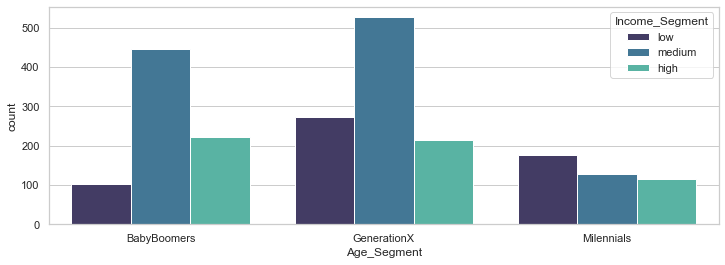

In [779]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['Age_Segment'], hue=df['Income_Segment'], palette='mako');

Bisa disimpulkan hubungan antara `Age_Segment` dengan `Income_Segment`. Lebih dari 400 orang dari populasi kategori BabyBoomers dan GenerationX adalah yg memiliki income segmen medium yg juga merupakan paling tinggi dibanding income segmen low dan high. Sedangkan pada Milennials ditemukan segmen low yg paling tinggi.  

#### 5.1.1 Chi-Squared Test
- Untuk membuktikan ada/tidaknya keterkaitan (_dependency_) antara feature `Age_Segment` dengan `Income_Statement` maka kita akan melakukan analisa menggunakan Chi-Square

Di bawah ini adalah crosstab dari 2 kolom (`Age_Segment` dan `Income_Statement`). 
Kita akan menguji apakah Gender terkait dengan pilihan buah yang akan dibeli.

Hipotesis
- Ho: Feature `Age_Segment` dan `Income_Statement` adalah independent (tidak terkait)
- Ha: Feature `Age_Segment` dan `Income_Statement` adalah dependent (terkait)

In [780]:
df_cross = pd.crosstab(df['Age_Segment'], df['Income_Segment'])

In [781]:
stat, pvalue, dof, expected = chi2_contingency(df_cross)
pvalue 

4.084826150654772e-30

In [782]:
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05 (alpha). Fail to reject Ho.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05 (alpha). Reject Ho.
    ''')


    pvalue = 4.084826150654772e-30. pvalue <= 0.05 (alpha). Reject Ho.
    


**Analysis Conclusion**

Dari Penjabaran diatas maka dapat **disimpulkan** bahwa:
- Dari hasi uji statistik, bisa dilihat bahwa `Age_Segment` dan `Income_Statement` saling terkait (dependence) atau terdapat hubungan yang signifikan.
- Karena saling berpengaruh, maka treatment harus berbeda terhadap tiap `Age_Segment`.

### 5.2 Analisis 2
- Hubungan antara kolom `Age_Segment` dengan `PrimerProds`, `SekunderProds` dan `TersierProds`

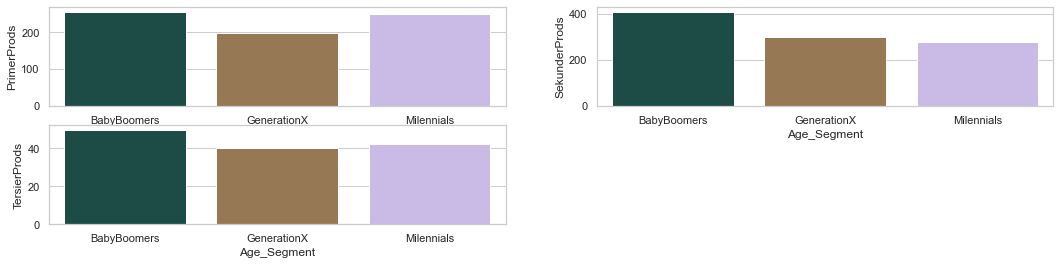

In [783]:
plotnumber=1
plt.figure(figsize=(18,4))
# sns.set(style='whitegrid', palette='Set1')
for col in ['PrimerProds', 'SekunderProds', 'TersierProds']:
    ax = plt.subplot(2,2, plotnumber)
    sns.barplot(x=df['Age_Segment'], y=df[col], ci=0, palette='cubehelix')
    plotnumber+=1

**Analysis Conclusion**
- Dari tiga kategori produk, `SekunderProds` merupakan produk yg paling banyak dibeli semua `Age_Segment`
- Dari tiga kategori produk, _BabyBoomers_ merupakan kategori dari `Age_Segment` yg melakukan transaksi dengan nilai paling tinggi.
- Urutan transaksi dari tinggi ke rendah untuk kategori umur terhadap `PrimerProds` adalah _BabyBoomers_ lalu _Milennials_ dan terakhir adalah _GenerationX_
- Urutan transaksi dari tinggi ke rendah untuk kategori umur terhadap `SekunderProds` adalah _BabyBoomers_ lalu _GenerationX_ dan terakhir adalah _Milennials_
- Urutan transaksi dari tinggi ke rendah untuk kategori umur terhadap `TersierProds` adalah _BabyBoomers_ lalu _Milennials_ dan terakhir adalah _GenerationX_

### 5.3 Analisis 3
- Hubungan antara kolom `Income_Segment` dengan `PrimerProds`, `SekunderProds` dan `TersierProds`

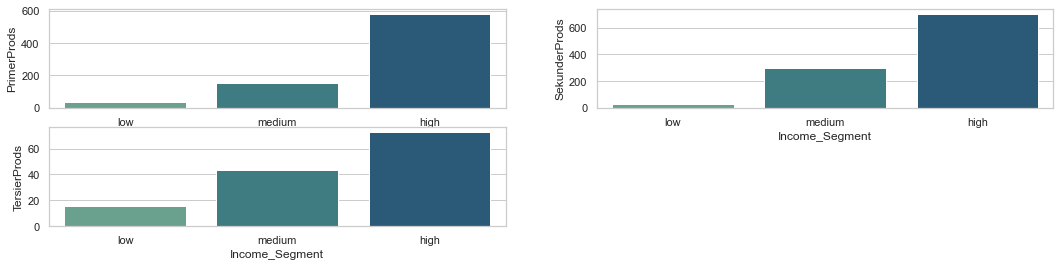

In [784]:
plotnumber=1
plt.figure(figsize=(18,4))
for col in ['PrimerProds', 'SekunderProds', 'TersierProds']:
    ax = plt.subplot(2,2, plotnumber)
    sns.barplot(x=df['Income_Segment'], y=df[col], ci=0, palette='crest')
    plotnumber+=1

**Analysis Conclusion**
- Dari tiga kategori produk, `SekunderProds` merupakan produk yg paling banyak dibeli semua `Income_Segment`
- Dari tiga kategori produk, _high_ merupakan kategori dari `Income_Segment` yg melakukan transaksi dengan nilai paling tinggi.
- Urutan `Income_Segment` transaksi dari tinggi ke rendah adalah _high_ lalu _medium_ dan _low_ terhadap semua kategori produk

### 5.4 Analisis 4 
- Hubungan antara kolom `Age_Segment` dan `Income_Segment` dengan `TotalMntSpent`

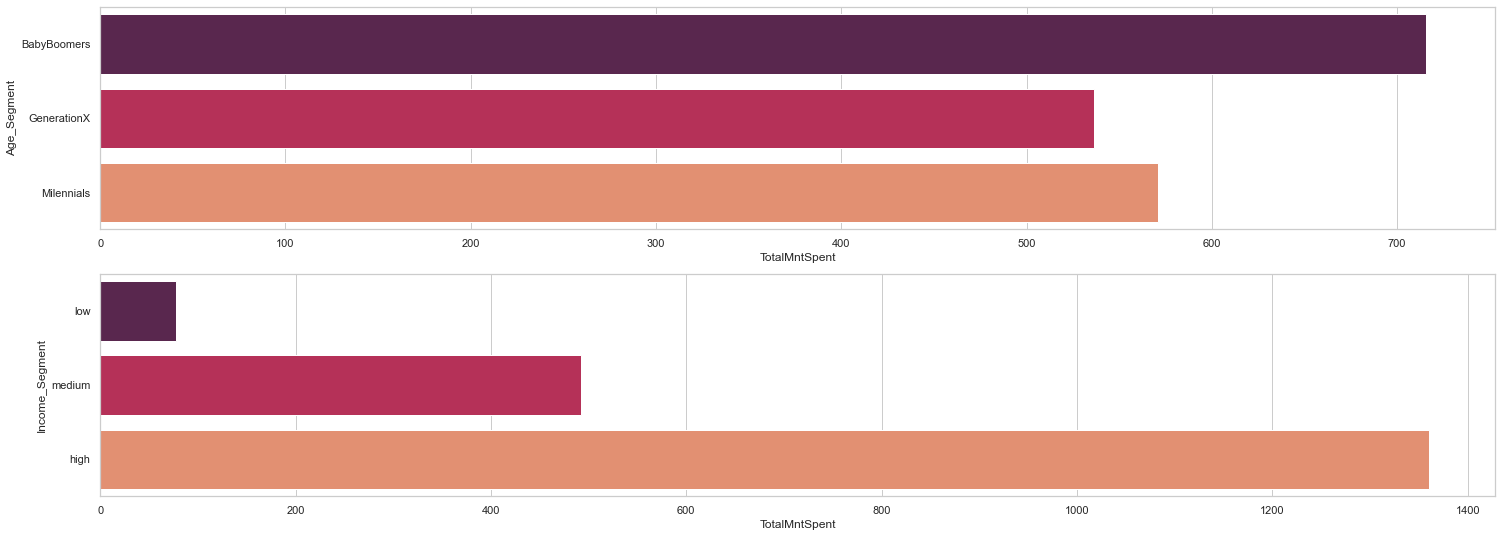

In [785]:
plotnumber=1
plt.figure(figsize=(25,9))
for col in ['Age_Segment','Income_Segment']:
    ax = plt.subplot(2,1, plotnumber)
    sns.barplot(x=df['TotalMntSpent'], y=df[col], palette='rocket', ci=0)
    plotnumber+=1;

**Analysis Conclusion**
- Dari tiga kategori umur, populasi _BabyBoomers_ merupakan yg paling banyak mengeluarkan uang untuk transaksi. Setelah itu kategori Milennials dan terakhir GenerationX.
- Dari tiga kategori income, populasi _high_ merupakan yg paling banyak mengeluarkan uang untuk transaksi. Setelah itu kategori _medium_ dan terakhir _low_.


### 5.5 Analisis 5
- Hubungan antara kolom `Age_Segment` dan `Income_Segment` dengan `TotalNumPurchases`

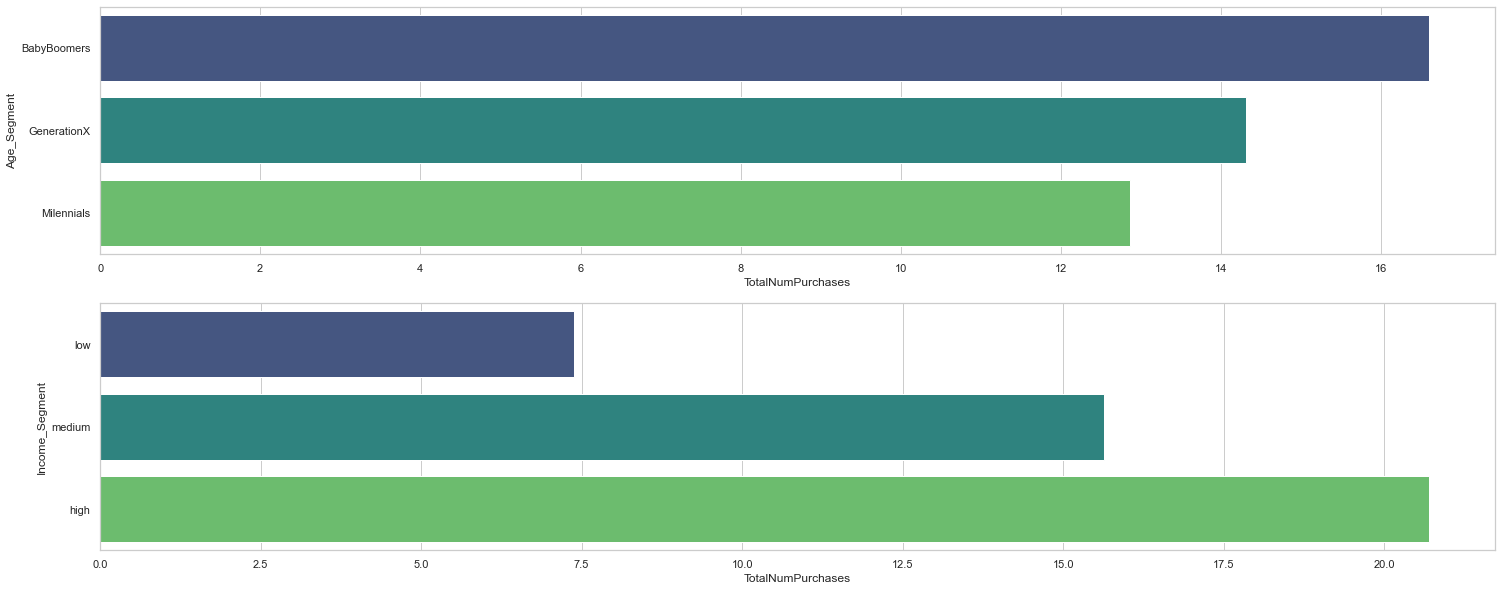

In [786]:
plotnumber=1
plt.figure(figsize=(25,10))
for col in ['Age_Segment','Income_Segment']:
    ax = plt.subplot(2,1, plotnumber)
    sns.barplot(x=df['TotalNumPurchases'], y=df[col], palette='viridis', ci=0)
    plotnumber+=1;

**Analysis Conclusion**
- Dari tiga kategori umur, populasi _BabyBoomers_ merupakan yg paling banyak membeli jumlah barang secara kuantitas (unit). Setelah itu kategori Milennials dan terakhir GenerationX.
- Dari tiga kategori income, populasi _high_ merupakan yg paling banyak membeli jumlah barang secara kuantitas (unit). Setelah itu kategori _medium_ dan terakhir _low_.


### 5.6 Analisis 6
- Hubungan antara kolom `Marital_Status` dengan `TotalMntSpent`, `TotalNumPurchases`, dan `TotalAccCmp`

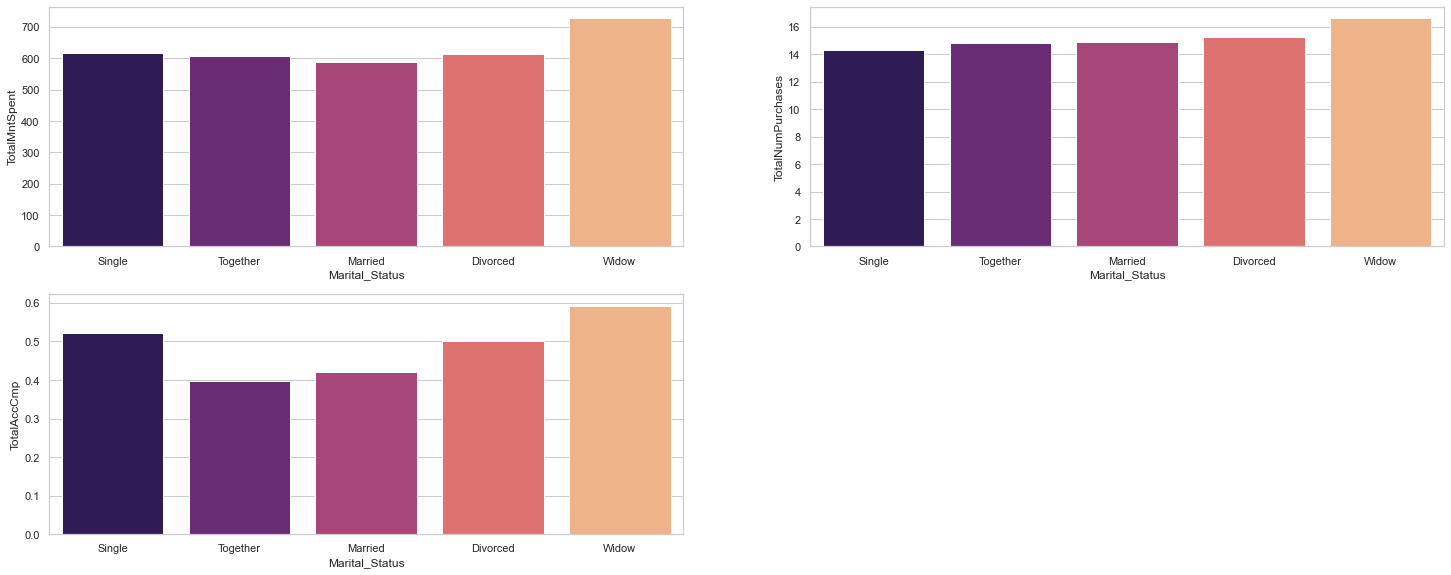

In [787]:
plotnumber=1
plt.figure(figsize=(25,15))
for col in ['TotalMntSpent','TotalNumPurchases', 'TotalAccCmp']:
    ax = plt.subplot(3,2, plotnumber)
    sns.barplot(x=df['Marital_Status'], y=df[col], palette='magma', ci=0)
    plotnumber+=1;

**Analysis Conclusion**
- Dari lima kategori `Marital_Status`, _Widow_ merupakan kelompok yg paling royal karena paling banyak melakukan transaksi secara kuantitas, nilai dolar dan accept campaign.
- Dari lima kategori `Marital_Status` , _Together_ merupakan kategori dari `Marital_Status` yg paling rendah menerima campaign.
- Urutan transaksi dari tinggi ke rendah untuk kategori status perkawinan terhadap `TotalMntSPent` adalah _Widow_,_Single_,_Divorced,_Together_ dan terakhir adalah _Married_
- Urutan transaksi dari tinggi ke rendah untuk kategori status perkawinan terhadap `TotalNumPurchases` adalah _Widow_,_Divorced_,_Married_,_Together_ dan terakhir adalah _Single_
- Urutan transaksi dari tinggi ke rendah untuk kategori status perkawinan terhadap `TotalAccCmp` adalah _Widow_,_Single_,_Divorced,_Married_ dan terakhir adalah _Together_

### 5.7 Analisis 7
- Hubungan antara kolom `Edu_Segment` dengan `TotalMntSpent`, `TotalNumPurchases`, dan `TotalAccCmp`

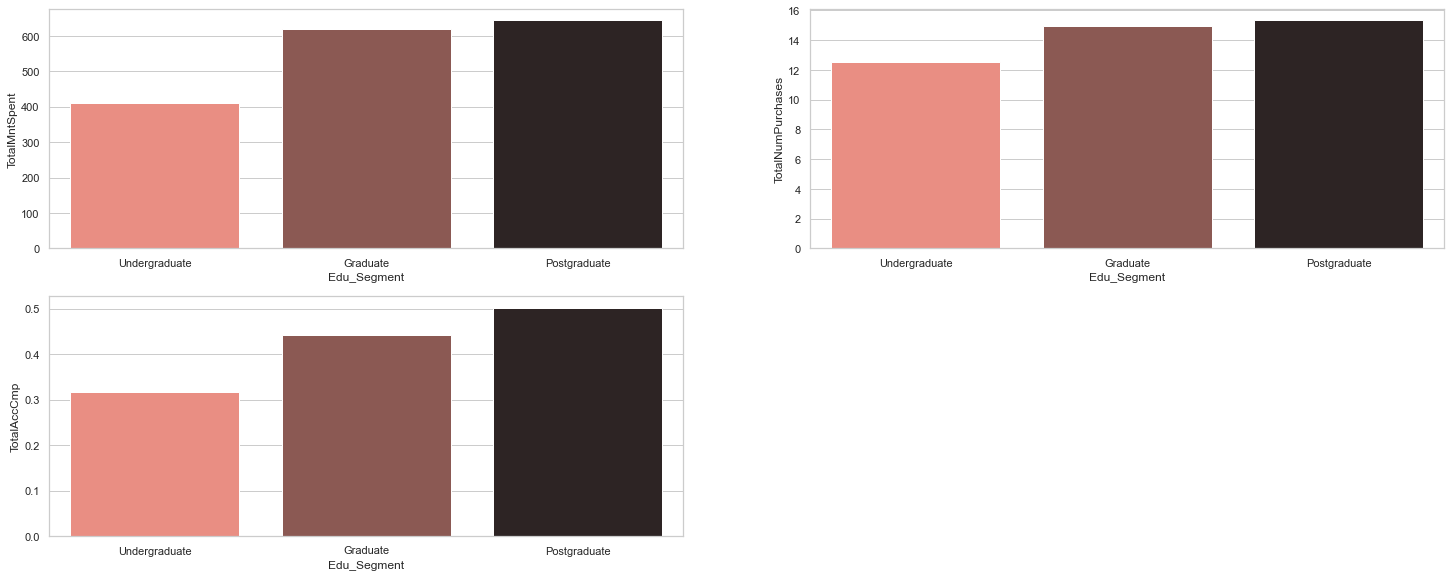

In [788]:
plotnumber=1
plt.figure(figsize=(25,15))
for col in ['TotalMntSpent','TotalNumPurchases', 'TotalAccCmp']:
    ax = plt.subplot(3,2, plotnumber)
    sns.barplot(x=df['Edu_Segment'], y=df[col], palette='dark:salmon_r', ci=0)
    plotnumber+=1;

**Analysis Conclusion**
- Dari tiga kategori `Edu_Segment`, _Postgraduate_ merupakan kelompok yg paling royal karena paling banyak melakukan transaksi secara kuantitas, nilai dolar dan accept campaign.
- Dari tiga kategori `Edu_Segment` , _Undergraduate_ merupakan kategori dari `Edu_Segment` yg paling rendah melakukan transaksi secara kuantitas, nilai dolar dan accept campaign.
- Urutan transaksi dari tinggi ke rendah untuk kategori tingkat pendidikan terhadap `TotalMntSPent`, `TotalNumPurchases` dan `TotalAccCmp` adalah _Postgraduate_,_Graduate_ dan _Undergraduate_


### 5.8 Analisis 8
- Berapa persen marketing campaign yg sukses (converted into transaction)?

In [789]:
df['TotalAccCmp'].value_counts()

0    1601
1     368
2     139
3      51
4      36
5      10
Name: TotalAccCmp, dtype: int64

In [790]:
# Membuat dataframe berisi jumlah komplain selama dua tahun terakhir
df_AccCmp = df.groupby(["TotalAccCmp"]).count()["Year_Birth"].reset_index()
df_AccCmp["TotalAccCmp"] = df_AccCmp["TotalAccCmp"].apply(lambda x: 'No' if x == 0 else 'Yes')
df['Year_Birth'].replace('TotalPop')

df_AccCmp.rename(columns = {'Year_Birth':'TotalPop'}, inplace = True)
df_AccCmp

,TotalAccCmp,TotalPop
0,No,1601
1,Yes,368
2,Yes,139
3,Yes,51
4,Yes,36
5,Yes,10


In [791]:
# Plotly Express
fig = px.pie(df_AccCmp,
             names = "TotalAccCmp", 
             values= "TotalPop",
             labels={'TotalAccCmp':'Accept Campaign', 'TotalPop':'Total'},
             title = 'Succeed Rate Accepted Campaign ')
fig.show()

**Analysis Conclusion**
- Dari seluruh populasi customer, hanya sekitar 27,4% yg melakukan transaksi minimal sekali setelah menerima 6 kali campaign dari perusahaan.
- Sebanyak 72,6% dari total populasi customer di dataset menerima 6 kali campaign dari perusahaan dan usaha marketing belum berhasil membuat customer melakukan transaksi.

## 6. Conclusion and Recommendation

### 6.1 Conclusion


Dari hasil analisis Marketing Campaign dataset, maka dapat disimpulkan bahwa:
- `Age_Segment` dan `Income_Statement` saling terkait (dependence) atau terdapat hubungan yang signifikan.
- Orang dengan segmen umur _BabyBoomers_ dan segment income nya _high_ adalah pelanggan yg paling royal karena telah mengeluarkan uang paling banyak.
- Orang dengan segmen umur _BabyBoomers_ dan segment income nya _high_ adalah pelanggan yg paling royal karena telah membeli barang (kuantitas) paling banyak.
- Orang dengan tingkat pendidikan _Postgraduate_ adalah pelanggan yg paling royal karena telah membeli barang paling banyak.
- Dari lima kategori `Marital_Status`, _Widow_ merupakan kelompok yg paling royal karena paling banyak melakukan transaksi secara kuantitas, nilai dolar dan accept campaign.
- Dari tiga kategori `Edu_Segment`, _Postgraduate_ merupakan kelompok yg paling royal karena paling banyak melakukan transaksi secara kuantitas, nilai dolar dan accept campaign.
- Dari seluruh populasi customer, hanya sekitar 27,4% yg melakukan transaksi minimal sekali setelah menerima 6 kali campaign dari perusahaan.


### 6.2 Recommendation

Dari hasil penarikan kesimpulan analisis Marketing Campaign dataset, maka beberapa rekomendasi untuk meningkatkan efektifitas dan efisiensi usaha marketing pada perusahaan adalah:
- Perusahaan diharapkan untuk membuat usaha marketing yg berbeda pada masing-masing segmentasi umur. Hal ini sesuai analisis statistik menggunakan Chi-Squared Test yg membuktikan terdapat hubungan yg signifikan antara segmen umur dan segmen income. Maka treatment marketing harus berbeda sesuai tiap segmen umur.
-  Usaha marketing bisa berfokus pada segmen umur BabyBoomers dan juga untuk produk sekunder yaitu wine dan sweets. Salah satu contohnya adalah menawarkan berbagai macam jenis wine dan sweets kepada populasi BabyBoomers.
- Perusahaan sudah mempunyai loyar customer yaitu populasi dengan segmen income high, ini juga dibuktikan dengan segmen income high menduduki posisi teratas untuk orang yg mengeluarkan uang paling banyak pada transaksi di perusahaan. 
- Perusahaan dapat melakukan lebih banyak marketing untuk memperluas jangkauan pasar kepada populasi dengan segmen income medium dan low.
- Melalui analisis, diketahui orang dengan status perkawinan widow adalah customer yg paling loyal. Usaha marketing bisa berfokus pada populasi tersebut.
- Pada segmen pendidikan, orang yg berlatar pendidikan Postgraduate adalah yg paling banyak melakukan transaksi. Maka target customer campaign berikutnya adalah populasi tersebut/
- Setelah mengetahui bahwa hanya sekitar 27,4% orang yg menerima campaign, perusahaan dapat melakukan survey kepada sampel populasi baik customer tetap ataupun calon customer untuk merencanakan usaha campaign yg lebih efektif guna meningkatkan _converted rate_ calon customer.